In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    number1: int 
    operation: str 
    number2: int
    finalNumber: int

In [3]:
def adder(state:AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    state["finalNumber"] = state["number1"] + state["number2"]

    return state

def subtractor(state:AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    state["finalNumber"] = state["number1"] - state["number2"]
    return state


def decide_next_node(state:AgentState) -> AgentState:
    """This node will select the next node of the graph"""

    if state["operation"] == "+":
        return "addition_operation"
    
    elif state["operation"] == "-":
        return "subtraction_operation" 
    
    
def router_node(state: AgentState) -> AgentState:
    return state

In [4]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", router_node) # passthrough function

graph.add_edge(START, "router") 

graph.add_conditional_edges(
    "router",
    decide_next_node, 

    {
        # Edge: Node
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }

)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

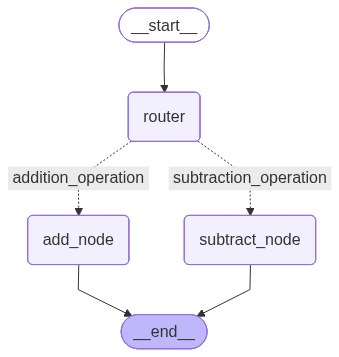

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
initial_state_1 = AgentState(number1 = 10, operation="+", number2 = 5)
print(initial_state_1)
print(app.invoke(initial_state_1))

{'number1': 10, 'operation': '+', 'number2': 5}
{'number1': 10, 'operation': '+', 'number2': 5, 'finalNumber': 15}
